# What are the factors that best predict the rate of homelessness in U.S. cities? 
Subquestion: What is the projected rate of homelessness in Hawaii for 2023?

The [HUD](https://www.huduser.gov/portal/pdrdatas_landing.html) website provides a variety of datasets regarding housing and homelessness that may prove useful.

## Description of Current Data:
- hic_df_total: 2007 - 2021 Housing Inventory Count (HIC) by State, 56 rows (one for each state, totalled stats)
- 

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### EDA hic_df_total

In [134]:
hic_df_total = pd.read_excel('https://www.huduser.gov/portal/sites/default/files/xls/2007-2021-HIC-Counts-by-State.xlsx', header=1)

In [135]:
hic_df_total.head()

State  Total Year-Round Beds (ES, TH, SH)  \
0    AK                                2270   
1    AL                                2394   
2    AR                                2615   
3    AZ                                6411   
4    CA                               60582   

   Total Non-DV Year-Round Beds (ES, TH, SH)  \
0                                       1703   
1                                       1892   
2                                       1996   
3                                       5718   
4                                      56569   

   Total HMIS Year-Round Beds (ES, TH, SH)  \
0                                     1603   
1                                     1365   
2                                     1399   
3                                     5047   
4                                    44594   

   HMIS Participation Rate for Year-Round Beds (ES, TH, SH)  \
0                                             0.7062          
1                                             0.5702          
2                                             0.5350          
3                                             0.7872          
4                                             0.7361          

   Total Year-Round Beds (ES)  Total Year-Round Beds (TH)  \
0                        1769                         501   
1                        1682                         678   
2                        2238                         377   
3                        4292                        2026   
4                       45229                       14800   

   Total Year-Round Beds (SH)  \
0                           0   
1                          34   
2                           0   
3                          93   
4                         553   

   Total Units for Households with Children (ES, TH, SH)  \
0                                                204       
1                                                300       
2                                                270       
3                                                818       
4                                               7671       

   Total Beds for Households with Children (ES, TH, SH)  ...  \
0                                                603     ...   
1                                                831     ...   
2                                                922     ...   
3                                               2752     ...   
4                                              23745     ...   

   Total Year-Round Beds (OPH)  Total Non-DV Year-Round Beds (OPH)  \
0                           88                                  88   
1                           42                                  42   
2                            0                                   0   
3                          354                                 354   
4                        11044                               10891   

   Total HMIS Year-Round Beds (OPH)  \
0                                88   
1                                42   
2                                 0   
3                               354   
4                              6092   

   HMIS Participation Rate for Year-Round Beds (OPH)  \
0                                                  1   
1                                                  1   
2                                                  .   
3                                                  1   
4                                             0.5516   

   Total Units for Households with Children (OPH)  \
0                                               3   
1                                               0   
2                                               0   
3                                              73   
4                                            1100   

   Total Beds for Households with Children (OPH)  \
0                                              8   
1                                             

In [136]:
hic_df_total.shape

(56, 77)

In [137]:
hic_df_total.columns

Index(['State', 'Total Year-Round Beds (ES, TH, SH)',
       'Total Non-DV Year-Round Beds (ES, TH, SH)',
       'Total HMIS Year-Round Beds (ES, TH, SH)',
       'HMIS Participation Rate for Year-Round Beds (ES, TH, SH)',
       'Total Year-Round Beds (ES)', 'Total Year-Round Beds (TH)',
       'Total Year-Round Beds (SH)',
       'Total Units for Households with Children (ES, TH, SH)',
       'Total Beds for Households with Children (ES, TH, SH)',
       'Total Beds for Households without Children (ES, TH, SH)',
       'Total Beds for Households with only Children (ES, TH, SH)',
       'Dedicated Veteran Beds (ES, TH, SH)',
       'Dedicated Youth Beds (ES, TH, SH)', 'Total Year-Round Beds (ES).1',
       'Total Non-DV Year-Round Beds (ES)', 'Total HMIS Year-Round Beds (ES)',
       'HMIS Participation Rate for Year-Round Beds (ES)',
       'Total Seasonal Beds (ES)', 'Total Overflow Beds (ES)',
       'Total Units for Households with Children (ES)',
       'Total Beds for Households

### EDA Homelessness Prediction Data

#### Learning about the features of our dataset:

This data is from [this article](https://www.huduser.gov/portal/publications/Market-Predictors-of-Homelessness.html) titled Market Predictors of Homelessness: How Housing and Community Factors Shape Homelessness Rates Within Continuums of Care. The article found that housing factors are most consistently associated with higher rates of community-level homelessness (at the Continuum of Care (CoC) level). 

In [138]:
raw_df = pd.read_csv('https://www.huduser.gov/portal/sites/default/files/xls/05b_analysis_file_update.csv')

data_dict = pd.read_excel('https://www.huduser.gov/portal/sites/default/files/xls/HUD%20TO3%20-%2005b%20Analysis%20File%20-%20Data%20Dictionary.xlsx')


Inspecting the data dictionary is very informative. Let's take a look first at what variables can be considered "Outcomes". 

In [139]:
from tabulate import tabulate

In [140]:
temp = data_dict[data_dict['Associated Domain'] == 'Outcome']
outcome_features = temp['Variable'].values

print(tabulate(temp[['Variable', 'Variable Label']], headers='keys', tablefmt='psql'))


+-----+-----------------------------+--------------------------------------------------------------------+
|     | Variable                    | Variable Label                                                     |
|-----+-----------------------------+--------------------------------------------------------------------|
|   2 | pit_tot_shelt_pit_hud       | total sheltered - HUD PIT                                          |
|   3 | pit_tot_unshelt_pit_hud     | total unsheltered - HUD PIT                                        |
|   4 | pit_tot_hless_pit_hud       | total homeless - HUD PIT                                           |
| 126 | pit_miss                    | sum of all PIT count values                                        |
| 127 | odd_flag                    | odd year of data indicator                                         |
| 128 | pit_hless_balance           | number of non-missing total homeless values across all years       |
| 129 | pit_shelt_balance           |

In [141]:
# this is here if I ever want to inspect the meaning of a specific feature
def what_is_this_feature(feat_name):
    print(data_dict[data_dict['Variable'] == feat_name]['Variable Label'].values)

what_is_this_feature('pit_tot_hless_pit_hud')

['total homeless - HUD PIT']


In [142]:
raw_df.head()

year cocnumber  pit_tot_shelt_pit_hud  pit_tot_unshelt_pit_hud  \
0  2010    AK-500                 1113.0                    118.0   
1  2011    AK-500                 1082.0                    141.0   
2  2012    AK-500                 1097.0                     50.0   
3  2013    AK-500                 1070.0                     52.0   
4  2014    AK-500                  970.0                     53.0   

   pit_tot_hless_pit_hud  pit_ind_shelt_pit_hud  pit_ind_unshelt_pit_hud  \
0                 1231.0                  633.0                    107.0   
1                 1223.0                  677.0                    117.0   
2                 1147.0                  756.0                     35.0   
3                 1122.0                  792.0                     52.0   
4                 1023.0                  688.0                     48.0   

   pit_ind_hless_pit_hud  pit_perfam_shelt_pit_hud  \
0                  740.0                     480.0   
1                  794.0                     405.0   
2                  791.0                     341.0   
3                  844.0                     278.0   
4                  736.0                     282.0   

   pit_perfam_unshelt_pit_hud  ...  sub_high_cost_rent75  \
0                        11.0  ...                     1   
1                        24.0  ...                     1   
2                        15.0  ...                     1   
3                         0.0  ...                     1   
4                         5.0  ...                     1   

   sub_high_cost_homeval75  sub_high_rent_share75  tight_high_cost_rental_mkt  \
0                        1                      1                           3   
1                        1                      0                           3   
2                        1                      1                           3   
3                        1                      0                           3   
4                        1                      1                           3   

   sub_tight_high_cost_rent  sub_west_coast_all_urb  sub_west_census  \
0                         1                       1                1   
1                         1                       1                1   
2                         1                       1                1   
3                         1                       1                1   
4                         1                       1                1   

   major_city  suburban  rural  
0           1         0      0  
1           1         0      0  
2           1         0      0  
3           1         0      0  
4           1         0      0  

[5 rows x 332 columns]

In [143]:
raw_df.describe()

year  pit_tot_shelt_pit_hud  pit_tot_unshelt_pit_hud  \
count  3008.000000            2994.000000              2994.000000   
mean   2013.500000            1033.852037               526.581830   
std       2.291669            3445.807044              1742.313472   
min    2010.000000               3.000000                 0.000000   
25%    2011.750000             224.000000                36.250000   
50%    2013.500000             445.500000               114.000000   
75%    2015.250000             961.500000               418.250000   
max    2017.000000           72565.000000             42828.000000   

       pit_tot_hless_pit_hud  pit_ind_shelt_pit_hud  pit_ind_unshelt_pit_hud  \
count            2994.000000            2994.000000              2994.000000   
mean             1560.433868             540.342351               442.891784   
std              4313.387045            1367.938173              1569.110148   
min                 7.000000               0.000000                 0.000000   
25%               320.250000             120.250000                31.000000   
50%               679.000000             253.000000                98.000000   
75%              1468.000000             560.000000               337.000000   
max             76501.000000           27188.000000             41241.000000   

       pit_ind_hless_pit_hud  pit_perfam_shelt_pit_hud  \
count            2994.000000               2994.000000   
mean              983.230795                493.509686   
std              2497.924191               2134.964146   
min                 2.000000                  0.000000   
25%               192.000000                 89.000000   
50%               428.000000                175.000000   
75%               930.000000                397.000000   
max             49265.000000              45711.000000   

       pit_perfam_unshelt_pit_hud  pit_perfam_hless_pit_hud  ...  \
count                 2994.000000               2994.000000  ...   
mean                    83.693387                577.203073  ...   
std                    338.834491               2179.472363  ...   
min                      0.000000                  0.000000  ...   
25%                      0.000000                107.000000  ...   
50%                      6.000000                217.000000  ...   
75%                     40.000000                493.000000  ...   
max                   6948.000000              45711.000000  ...   

       sub_high_cost_rent75  sub_high_cost_homeval75  sub_high_rent_share75  \
count           3008.000000              3008.000000            3008.000000   
mean               0.610372                 0.632314               0.600399   
std                0.487747                 0.482256               0.489898   
min                0.000000                 0.000000               0.000000   
25%                0.000000                 0.000000               0.000000   
50%                1.000000                 1.000000               1.000000   
75%                1.000000                 1.000000               1.000000   
max                1.000000                 1.000000               1.000000   

       tight_high_cost_rental_mkt  sub_tight_high_cost_rent  \
count                 3008.000000               3008.000000   
mean                     1.950133                  0.562500   
std                      1.341383                  0.496161   
min                      0.000000                  0.000000   
25%                      0.000000                  0.000000   
50%                      3.000000                  1.000000   
75%                      3.000000                  1.000000   
max                      4.000000                  1.000000   

       sub_west_coast_all_urb  sub_west_census   major_city     suburban  \
count             3008.000000      3008.000000  3008.000000  3008.000000   
mean                 0.140957         0.194149     0.276596     0.425532   
std               

#### Handling missing data:
There is a lot of it.

<AxesSubplot: >

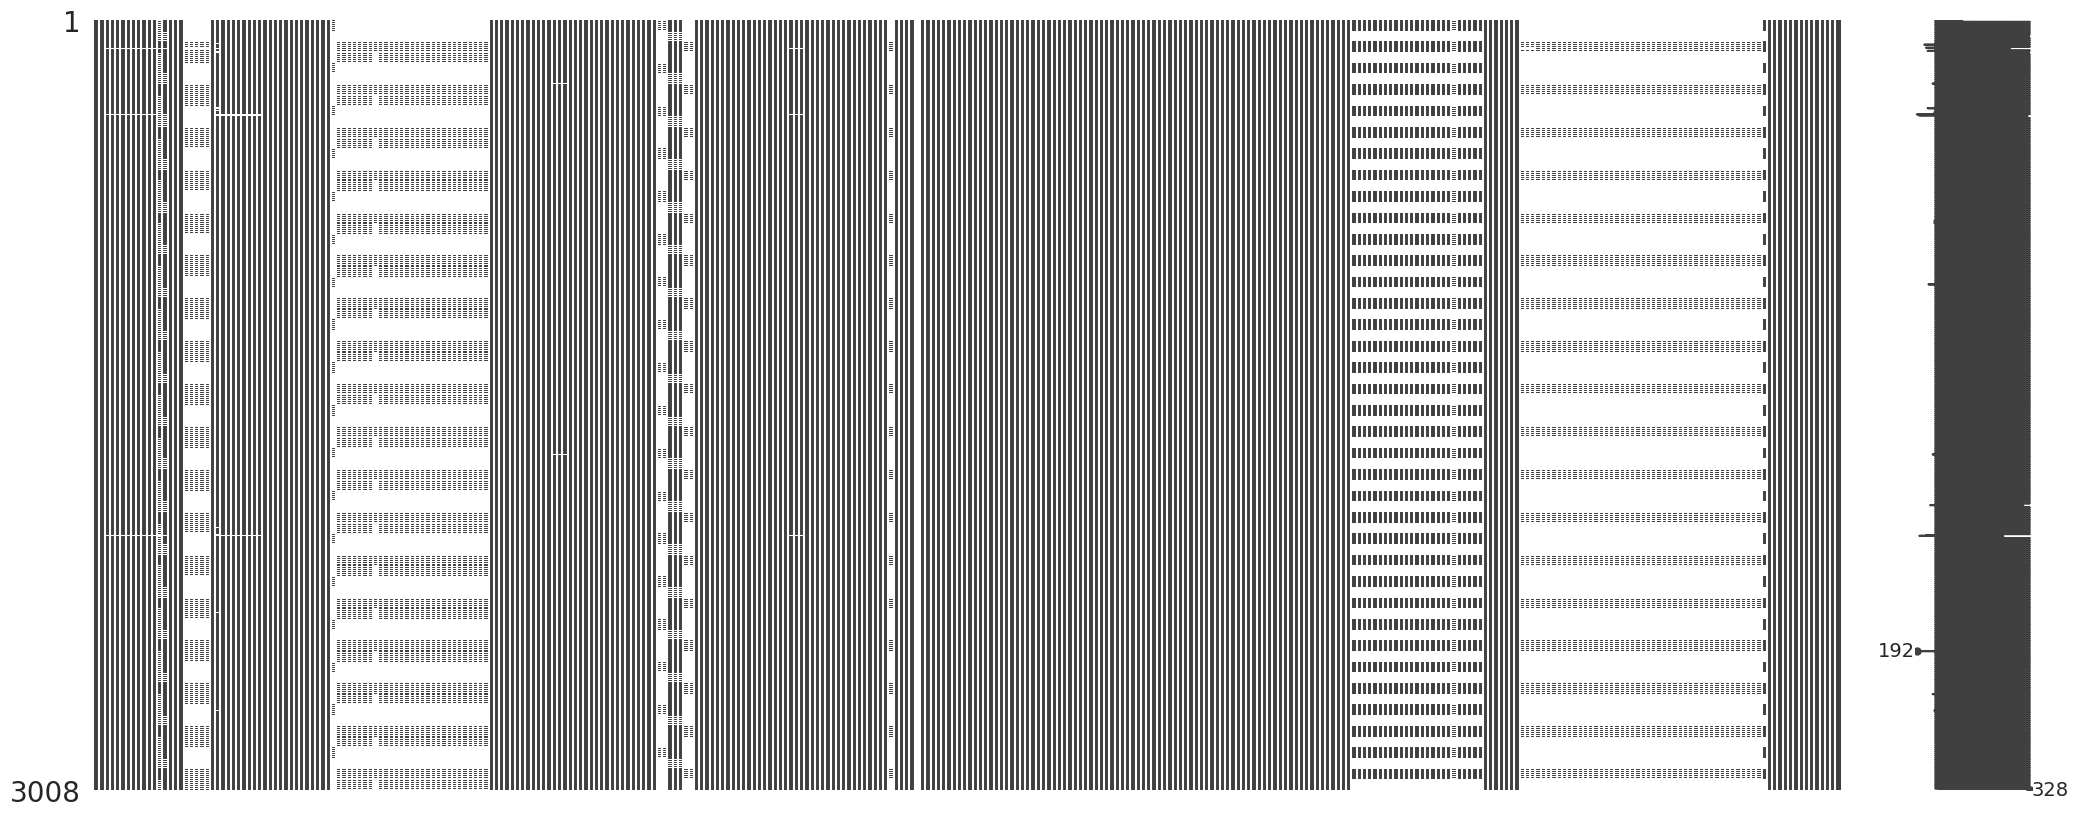

In [144]:
import missingno as msno

msno.matrix(raw_df)

In [145]:
raw_df.isnull().sum().sort_values(ascending=False)

dem_health_ins_acs5yr_2012       3008
d_pit_hless_pit_hud_share        2635
d_pit_shelt_pit_hud_share        2635
d_pit_unshelt_pit_hud_share      2635
d_hou_pol_occhudunit_psh_hud     2632
                                 ... 
dem_soc_ed_hsgrad_acs5yr_2012       0
dem_soc_ed_hsgrad_acs5yr_2017       0
dem_soc_ed_lesshs_acs5yr_2012       0
cocnumber                           0
rural                               0
Length: 332, dtype: int64

Let's inspect what some of these features with almost all NaNs actually are.

In [146]:
what_is_this_feature('dem_health_ins_acs5yr_2012')
what_is_this_feature('d_pit_hless_pit_hud_share')



['2011 share of the population with health insurance']
['4-year change in pit_hless_pit_hud_share values (2017 and 2013)']


In [147]:
raw_df['dem_health_ins_acs5yr_2012']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
3003   NaN
3004   NaN
3005   NaN
3006   NaN
3007   NaN
Name: dem_health_ins_acs5yr_2012, Length: 3008, dtype: float64

Certainly if all of the values are NaN in a feature there is no predictive power in the feature, let's drop it.

In [148]:
raw_df.drop(['dem_health_ins_acs5yr_2012'], axis=1, inplace=True)

Some of these features with a large majority of missing vals are considered "Outcome" values and wouldn't be included in our predictive feature space anyway, so let's drop these target features and move to handle NaNs from there.

In [149]:
raw_df.isnull().sum().sort_values(ascending=False)

d_pit_hless_pit_hud_share        2635
d_pit_shelt_pit_hud_share        2635
d_pit_unshelt_pit_hud_share      2635
d_hou_pol_fedfundcoc             2632
d_dem_soc_asian_census_share     2632
                                 ... 
dem_soc_ed_hsgrad_acs5yr_2012       0
dem_soc_ed_hsgrad_acs5yr_2017       0
dem_soc_ed_lesshs_acs5yr_2012       0
cocnumber                           0
rural                               0
Length: 331, dtype: int64

In [150]:
what_is_this_feature('d_econ_sn_cashasst_xt')
what_is_this_feature('d_hou_pol_occhudunit_psh_hud')



['4-year change in econ_sn_cashasst_xt values (2017 and 2013)']
['4-year change in hou_pol_occhudunit_psh_hud values (2017 and 2013)']


It seems that this dataframe used the difference in certain features between 2017 and 2013 to engineer a new feature. This dataset includes years that aren't 2017 and 2013, however, and therefore there are a lot of missing values. I'm not sure the usecase for these values, so let's just drop them.

In [151]:

difference_cols = raw_df.columns[["d_" in i[:2] for i in raw_df.columns ]].values
raw_df.drop(difference_cols, axis=1, inplace=True)
print(len(difference_cols), " columns dropped")

46  columns dropped


In [152]:
# TODO: evaluate what these features mean
raw_df.drop(raw_df.columns[(raw_df.isnull().sum() == 2632)].values, axis=1, inplace=True)

Honestly, let's just drop all columns with NaNs in them, because there are 84 of them and I'm not really sure what they are. However, let's exclude the outcome features and simply drop those by row.

In [153]:
print(f"There are {(raw_df.isnull().sum() != 0).sum()} features with NaNs in them")

raw_df.drop([col for col in raw_df.columns[(raw_df.isnull().sum() != 0)].values if col not in outcome_features], axis=1, inplace=True)

print(f"Dropped NaNs by column: there are {(raw_df.isnull().sum() != 0).sum()} features with NaNs in them")

raw_df.dropna(inplace=True) # drop NaNs by rows

print(f"Dropping NaNs by rows: there are {(raw_df.isnull().sum() != 0).sum()} features with NaNs in them")


There are 90 features with NaNs in them
Dropped NaNs by column: there are 6 features with NaNs in them
Dropping NaNs by rows: there are 0 features with NaNs in them


In [154]:
raw_df.shape

(2994, 194)

Now that we have dropped a lot of columns, let's print out the description of those that remain to keep as a record.

In [155]:
print(tabulate(data_dict[[i in raw_df.columns.values for i in data_dict['Variable']]][['Variable', 'Variable Label']], headers='keys', tablefmt='psql'))

+-----+----------------------------------+----------------------------------------------------------------------------------+
|     | Variable                         | Variable Label                                                                   |
|-----+----------------------------------+----------------------------------------------------------------------------------|
|   0 | year                             | year                                                                             |
|   1 | cocnumber                        | continuum of care number                                                         |
|   2 | pit_tot_shelt_pit_hud            | total sheltered - HUD PIT                                                        |
|   3 | pit_tot_unshelt_pit_hud          | total unsheltered - HUD PIT                                                      |
|   4 | pit_tot_hless_pit_hud            | total homeless - HUD PIT                                                   

It's helpful to look at the distribution of the types of columns that we have in our data. 

In [156]:
data_dict['Associated Domain'].value_counts()

Demographic          93
Housing              89
Safety Net           45
Economic             34
Outcome              22
Secondary Outcome    14
Subgroup             14
Climate               8
Local Policy          5
Identifier            4
Geography             4
Name: Associated Domain, dtype: int64

#### Managing Datatypes

In [157]:
raw_df = raw_df.convert_dtypes() # this didn't do much
categorical_features = list(raw_df.columns[((raw_df.dtypes != "Int64") & (raw_df.dtypes != "Float64"))].values) # we should drop these features before modelling

In [158]:
raw_df.groupby(['cocnumber']).sum()

/tmp/ipykernel_757817/501702472.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  raw_df.groupby(['cocnumber']).sum()


year  pit_tot_shelt_pit_hud  pit_tot_unshelt_pit_hud  \
cocnumber                                                          
AK-500     16108                   8199                      988   
AK-501     16108                   5016                     1172   
AL-500     16108                   7800                     4401   
AL-501     16108                   3026                     2107   
AL-502     16108                   1603                      172   
...          ...                    ...                      ...   
WV-500     16108                    831                      115   
WV-501     16108                   1695                      208   
WV-503     16108                   2693                      318   
WV-508     16108                   6214                     3595   
WY-500     16108                   3757                     3911   

           pit_tot_hless_pit_hud  econ_urb_urbanicity  coctag  panelvar  \
cocnumber                                                                 
AK-500                      9187                   24       1         8   
AK-501                      6188                    8       1        16   
AL-500                     12201                   16       1        24   
AL-501                      5133                   24       1        32   
AL-502                      1775                    8       1        40   
...                          ...                  ...     ...       ...   
WV-500                       946                    8       1      2992   
WV-501                      1903                    8       1      3000   
WV-503                      3011                   16       1      3008   
WV-508                      9809                    8       1      3016   
WY-500                      7668                    8       1      3024   

           hou_pol_fedfundcoc  dem_pop_pop_census  dem_pop_male_census  ...  \
cocnumber                                                               ...   
AK-500              228.45752             2370146              1209126  ...   
AK-501               60.10038             3444663              1825871  ...   
AL-500              683.23731             7575279              3626627  ...   
AL-501               296.7977             4852056              2336501  ...   
AL-502               42.50069             2130112              1035103  ...   
...                       ...                 ...                  ...  ...   
WV-500               34.66596             1168112               567056  ...   
WV-501              144.90502             1103300               537988  ...   
WV-503               104.7769             2240164              1087585  ...   
WV-508              241.68885            10242641              5089408  ...   
WY-500               25.99368             4589664              2342139  ...   

           sub_high_cost_rent75  sub_high_cost_homeval75  \
cocnumber                                                  
AK-500                        8                        8   
AK-501                        6                        4   
AL-500                        4                        4   
AL-501                        4                        4   
AL-502                        4                        4   
...                         ...                      ...   
WV-500                        4                        4   
WV-501                        4                        4   
WV-503                        4                        4   
WV-508                        4                        4   
WY-500                        4                        4   

           sub_high_rent_share75  tight_high_cost_rental_mkt  \
cocnumber                                                      
AK-500                         6                          26   
AK-501                         4                          14   
AL-500                         4                          12   
AL-501                

#### Graphing Targets

Let's start with the target of `pit_hless_pit_hud_share`. As explored before, this variable represents the number of homeless per 10,000 population and therefore represents a normalized target feature.

In [159]:
target = 'pit_hless_pit_hud_share'
y_balanced = raw_df[target]

In [160]:
total_homeless_rates = pd.concat([raw_df[['cocnumber', 'state_abr', 'year']], y_balanced], axis=1)
total_homeless_rates[total_homeless_rates['year'] == 2017]

cocnumber state_abr  year  pit_hless_pit_hud_share
7       AK-500        AK  2017                37.931778
15      AK-501        AK  2017                16.143341
23      AL-500        AL  2017                11.395156
31      AL-501        AL  2017                 9.737114
39      AL-502        AL  2017                 5.843235
...        ...       ...   ...                      ...
2975    WV-500        WV  2017                 8.293972
2983    WV-501        WV  2017                15.034946
2991    WV-503        WV  2017                11.624221
2999    WV-508        WV  2017                 5.228957
3007    WY-500        WY  2017                14.925373

[374 rows x 4 columns]

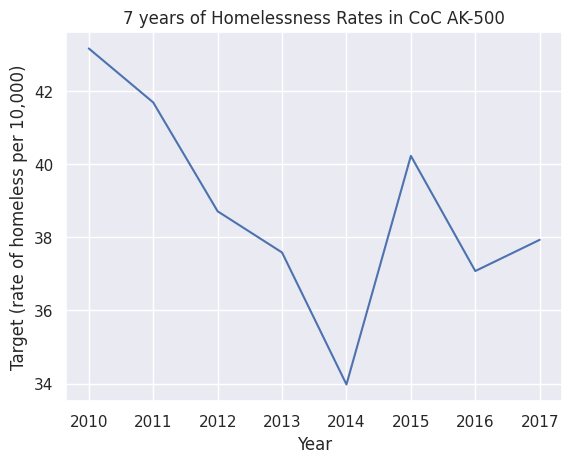

In [161]:
AK500_df = raw_df[raw_df["cocnumber"] == "AK-500"]

plt.plot(AK500_df['year'], AK500_df[target])
plt.rc('font', size=7)

plt.xlabel("Year")
plt.ylabel("Target (rate of homeless per 10,000)")
plt.title("7 years of Homelessness Rates in CoC AK-500");

Plotting some violin plots for the indicator variables in our dataset.

In [162]:
raw_df[target] = raw_df[target].astype('float64')

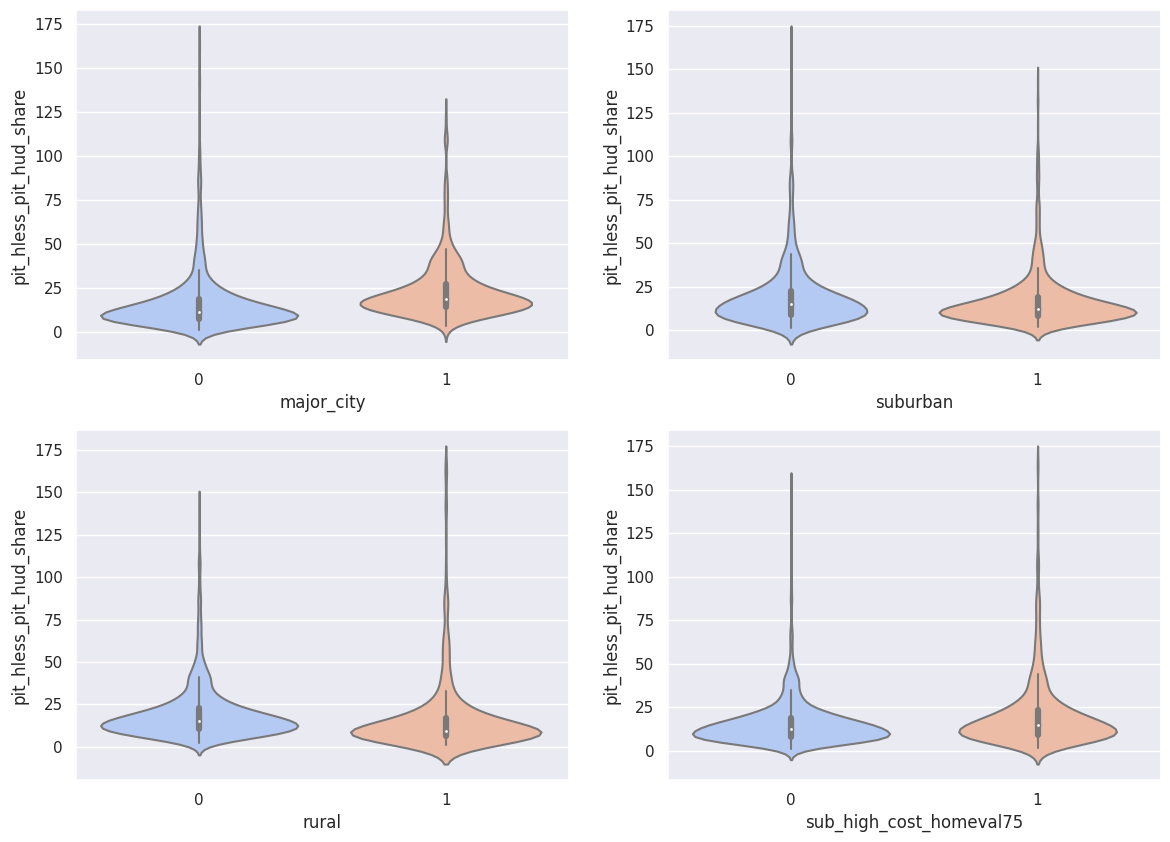

In [163]:
indicators = ['major_city', 'suburban', 'rural', 'sub_high_cost_homeval75']
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
ax = ax.flatten()

sns.set(font_scale=1)
for i, ind in enumerate(indicators):
    ax[i]
    sns.violinplot(x=ind, y=target, data=raw_df, palette="coolwarm", ax=ax[i])
    

These violin plot imply that the distribution of the target variable may be slightly different depending on some of our indicator variables. For example, the two features of rural and major city seem to shift the distribution of the target (at least shifting the mode of the distribution). 

Additionally, these graphs show that there may exist some outliers in our target dataset. Let's take a look at these outliers -- defined to have a target value more than 2 standard deviations away from the mean. In this case, we are only looking at the outliers on the upper side of rates of homelessness, in which the rates of homelessness are significantly higher than average.

In [164]:
outlier_rows = raw_df[raw_df[target] > raw_df[target].mean() + raw_df[target].std() * 2]

outlier_rows.cocnumber.value_counts()

CA-501    8
NY-600    8
CA-504    8
DC-500    8
CA-508    8
FL-604    8
CA-509    8
CA-506    7
FL-518    7
CA-522    7
FL-512    5
FL-519    5
CA-614    5
FL-505    5
OR-501    4
NY-607    3
OR-500    3
FL-501    3
LA-503    3
MA-504    2
MD-501    2
NC-516    2
FL-517    2
HI-500    2
CO-500    2
MA-507    1
MD-508    1
MO-602    1
CA-613    1
CA-603    1
CA-600    1
CA-524    1
OR-505    1
Name: cocnumber, dtype: Int64

We can identify the CoC communities that are most likely to have an outlier rate of homelessness. Some communities to keep in mind are `CA-509`, `DC-500`, `FL-604`. There seem to be some states that are more likely to be outliers, let's take a look at the distribution of states of the outlier rows.

In [165]:
outlier_rows['state_abr'].value_counts()

CA    55
FL    35
NY    11
DC     8
OR     8
LA     3
MA     3
MD     3
CO     2
HI     2
NC     2
MO     1
Name: state_abr, dtype: Int64

As expected, there are only a few states that are often extreme outliers for rates of homelessness. Taking a look at the states with the highest amount of extreme outliers, California and Florida have a few similarities that may suggest further correlational features to add. For example, both states have relatively warm weather. This may suggest that including average temperature + temperature fluctuation year over year for each community may improve predictability.

 #### Geospatial Graphs

It is important to be able to visualize our CoC communities to see exactly what each row of data in our dataset mean. Let's import a CoC regional map dataset from [here](https://hudgis-hud.opendata.arcgis.com/datasets/HUD::continuum-of-care-coc-grantee-areas/about) to map the data geospatially.

In [166]:
import geopandas as gpd

In [167]:
# data from: https://hudgis-hud.opendata.arcgis.com/datasets/HUD::continuum-of-care-coc-grantee-areas/explore?location=14.217388%2C129.771645%2C2.79
geo_df = gpd.read_file("data/Continuum_of_Care_(CoC)_Grantee_Areas.geojson")

In [168]:
geo_df.columns

Index(['OBJECTID', 'COCNAME', 'STUSAB', 'COCNUM', 'STATE_NAME', 'STATUS',
       'NEEDSTATUS', 'PPRN', 'ES_CN_HWACW', 'ES_CN_HWOA_TOT', 'ES_CN_HWOC',
       'ES_CN_VET', 'ES_VSO_HWAC_TOT', 'ES_VSO_HWOA_TOT', 'ES_VSO_HWOC_TOT',
       'ES_VSO_VET_TOT', 'TH_CN_HWAC_TOT', 'TH_CN_HWOA', 'TH_CN_HWOC',
       'TH_CN_VET', 'RRH_CN_HWAC_TOT', 'RRH_CN_HWOA', 'RRH_CN_HWOC',
       'RRH_CN_VET', 'PSH_CN_HWAC_TOT', 'PSH_CN_HWOA', 'PSH_CN_HWOC',
       'PSH_CN_VET', 'PSH_CN_CH', 'PSH_U_HWAC_TOT', 'PSH_U_HWOA', 'PSH_U_HWOC',
       'PSH_U_VET', 'PSH_U_CH', 'SH_CN_HWOA', 'SH_CN_HWOC', 'SH_CN_VET',
       'SH_PERS_HWOA', 'UNSH_PERS_HWOA', 'SH_PERS_HWOC', 'UNSH_PERS_HWOC',
       'SH_PERS_HWAC', 'UNSH_PERS_HWAC', 'SH_CH', 'UNSH_CH', 'SH_UY',
       'UNSH_UY', 'SH_VETS', 'UNSH_VETS', 'STATE', 'CONTACT_TYPE', 'PREFIX',
       'FIRST_NAME', 'LAST_NAME', 'SUFFIX', 'TITLE', 'PRIMARY_PHONE',
       'PRIMARY_PHONE_EXT', 'FAX', 'EMAIL_ADDRESS', 'YEAR', 'SHAPE_Length',
       'SHAPE_Area', 'geometry'],
      dt

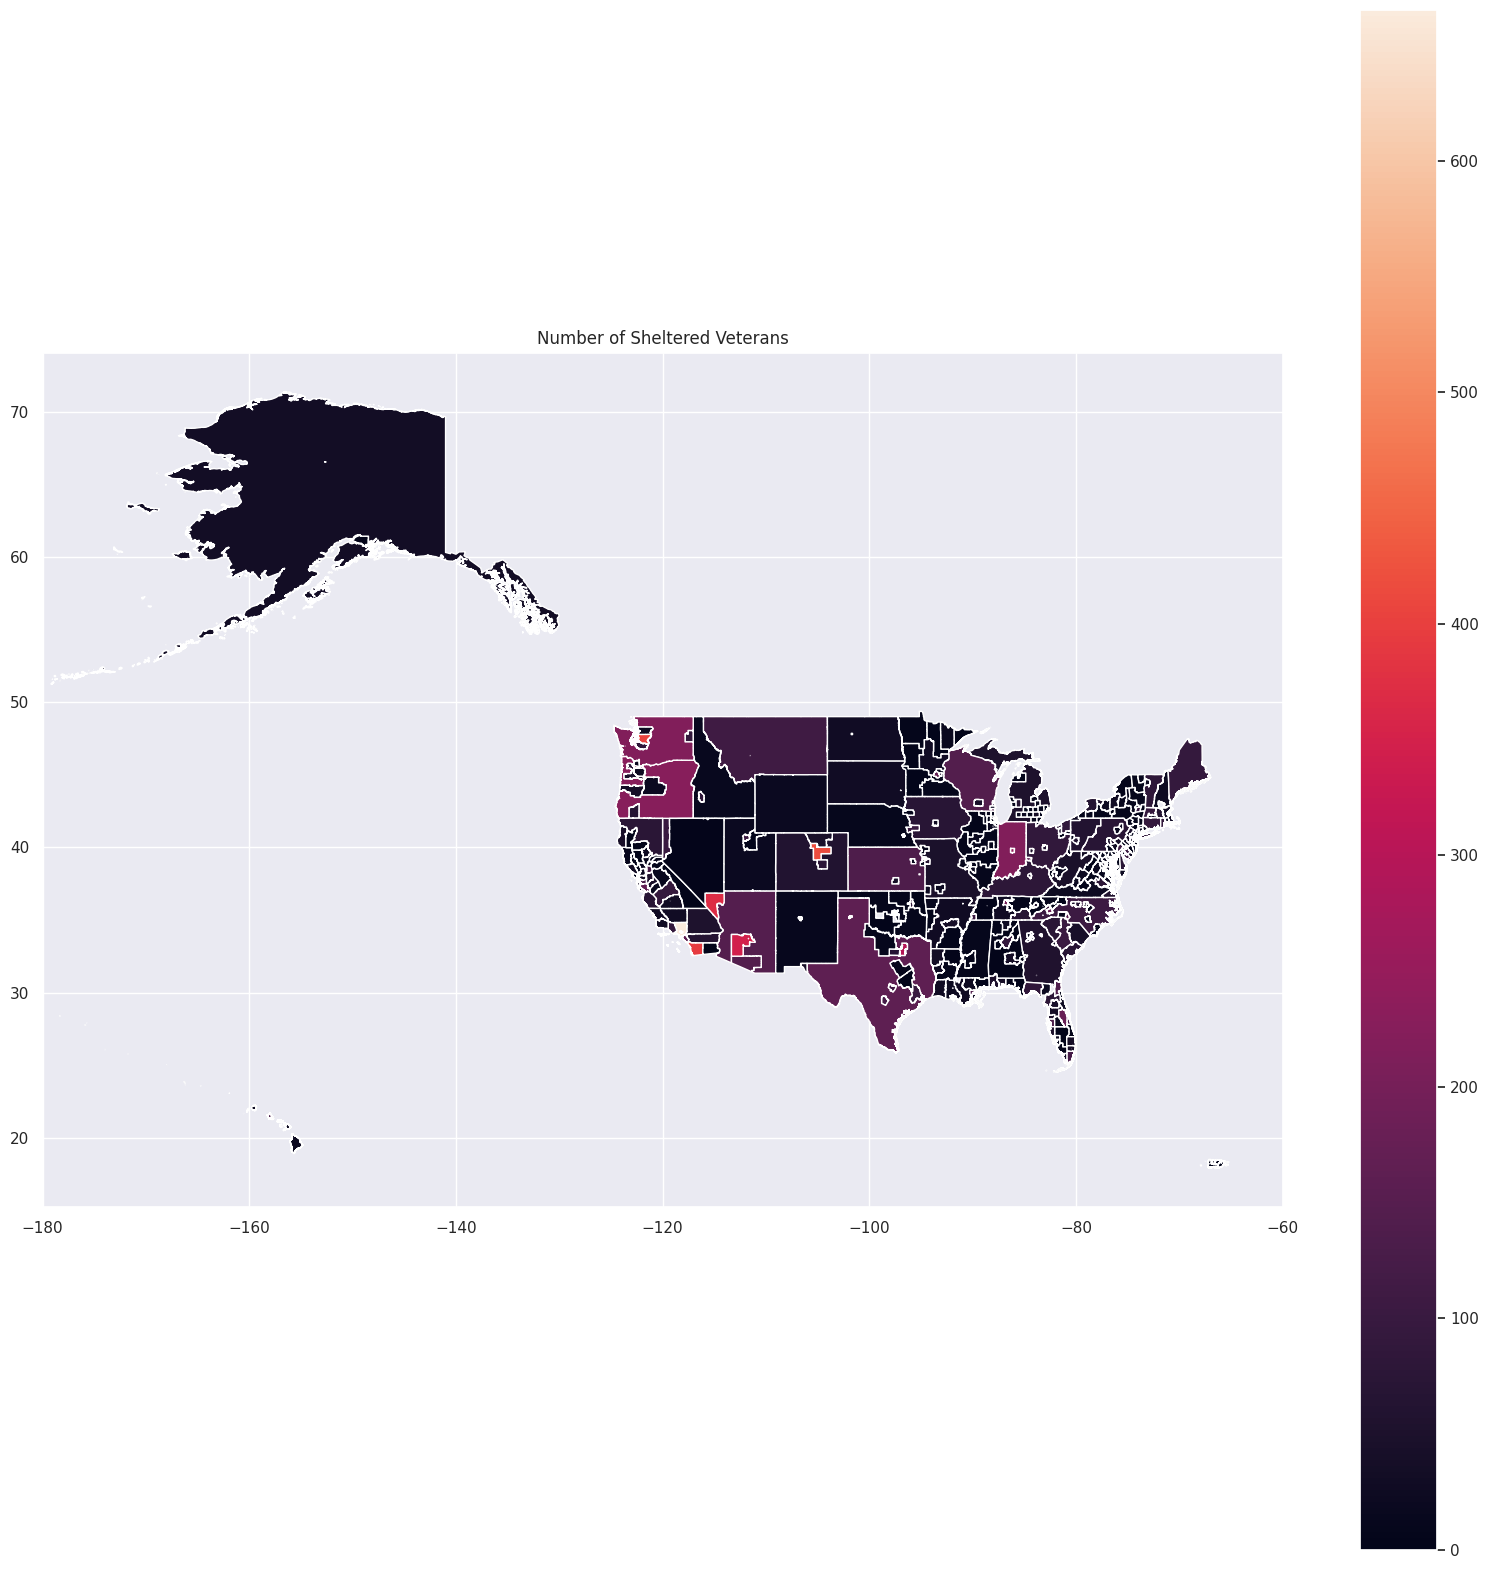

In [169]:
fig = plt.figure(figsize=(20, 20))
plt.rc('font', size=20)
ax = fig.add_subplot(111)
geo_df.plot("SH_VETS", ax=ax, legend=True);
ax.set_xlim(-180, -60);
ax.set_title("Number of Sheltered Veterans");

In [170]:
coc_areas_data_dict = pd.read_excel('./data/DD_Continuum_of_Care_(CoC)_Grantee_Areas.xlsx')
coc_areas_data_dict.head()

Column Name                                 Column Description       Type  \
0    OBJECTID  In ArcGIS, a system-managed value that uniquel...     NUMBER   
1     COCNAME                             Continuum of Care Name  NVARCHAR2   
2      STUSAB                                 State Abbreviation  NVARCHAR2   
3      COCNUM  Six-Digit Unique identifier for each Continuum...  NVARCHAR2   
4  STATE_NAME                                         State Name  NVARCHAR2   

  Width  
0   NaN  
1    85  
2   255  
3     6  
4    20

In [171]:
print(tabulate(coc_areas_data_dict[['Column Name', 'Column Description']], headers='keys', tablefmt='psql'))

+----+-------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|    | Column Name       | Column Description                                                                                                                                                |
|----+-------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 | OBJECTID          | In ArcGIS, a system-managed value that uniquely identifies a record or feature.                                                                                   |
|  1 | COCNAME           | Continuum of Care Name                                                                                                                                            |
|  2 | STUSAB            | State Abbreviation

[map of data](https://hudgis-hud.opendata.arcgis.com/datasets/HUD::continuum-of-care-coc-grantee-areas/explore?location=34.773931%2C-86.921770%2C4.75&style=Shape__Length)

Let's take a look at the CoC areas that we identified to be outliers of high rates of homelessness.

In [172]:
# extracting the CoC identifier for the top outliers
outlier_CoCs = outlier_rows.cocnumber.value_counts().index.values[:10]

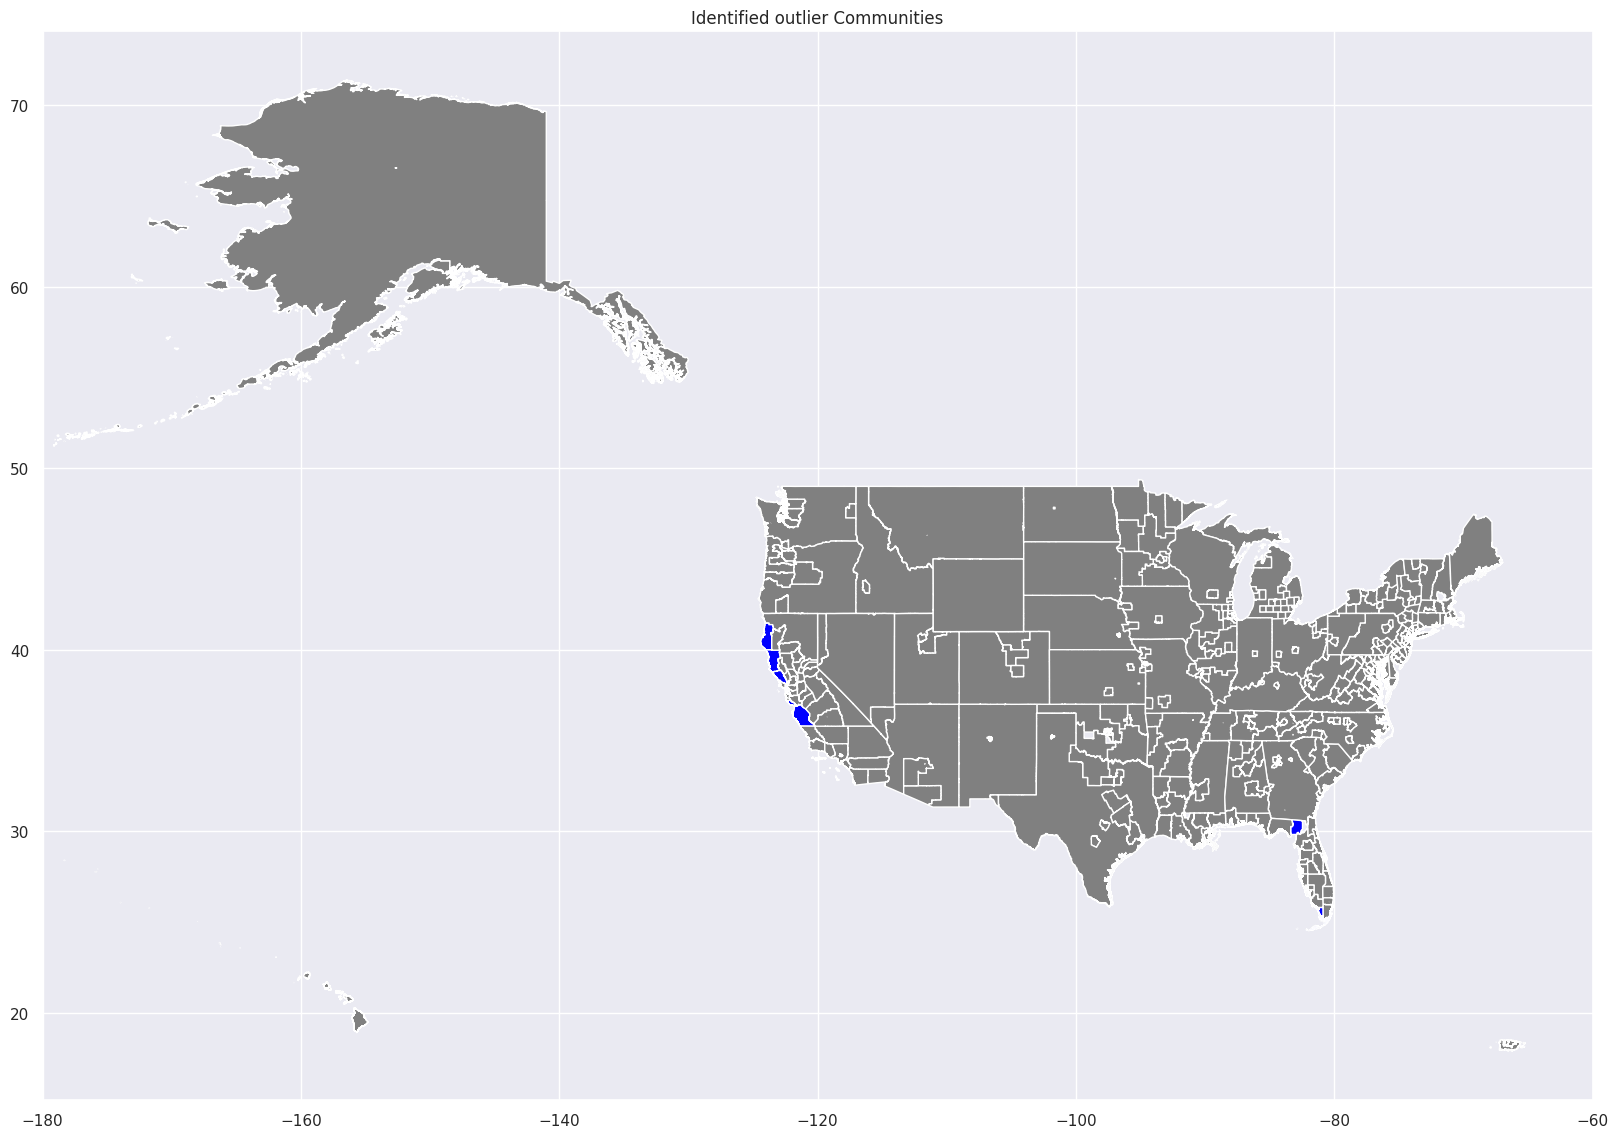

In [173]:
fig = plt.figure(figsize=(20, 20))
plt.rc('font', size=20)

ax = fig.add_subplot(111)
geo_df.plot(color=["blue" if cocnum in outlier_CoCs else "grey" for cocnum in geo_df['COCNUM']], ax=ax, legend=True);
ax.set_xlim(-180, -60);
ax.set_title("Identified outlier Communities");

With 100+ predictor columns, we are in need of performing feature analysis. Some questions we want to answer are: which features are the most predictive of the target? Which non-target features are correlated and might impact a multi-variable linear model. 

/tmp/ipykernel_757817/1174144339.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(raw_df.corr())


<AxesSubplot: >

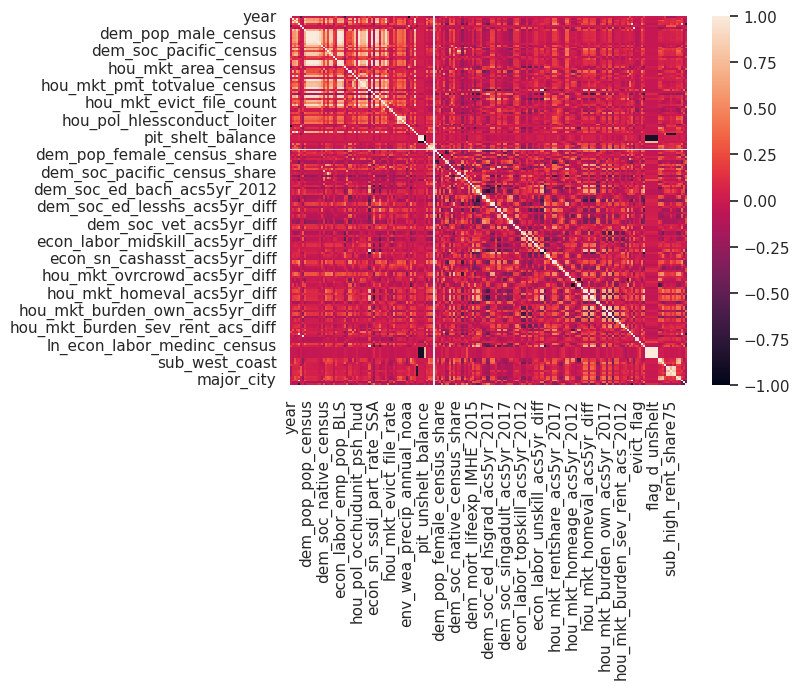

In [174]:
plt.rc('font', size=5)
sns.heatmap(raw_df.corr())

It's pretty hard to determine from the specific collinearity of features from this correlation map. Let's first plot the top 10 features that are correlated with our target feature of `pit_hless_pit_hud_share`

In our final model, however, we won't have access to "Outcome" variables that are in this data. Before we analyze correlation of the features let's drop the Outcome features that we aren't going to be using in prediction.

In [175]:
# identify the outcome features, exclude them in correlation
outcome_features = [i for i in data_dict[data_dict['Associated Domain'] == 'Outcome']['Variable'].values if i in raw_df.columns.values]
identifier_features = [i for i in data_dict[data_dict['Associated Domain'] == 'Identifier']['Variable'].values if i in raw_df.columns.values]

corr_df = raw_df.drop(outcome_features + identifier_features + ["state_abr"], axis=1)
corr_df = pd.concat([corr_df, raw_df[target]], axis=1)


In [176]:
high_corr_features = abs(corr_df.corr()[target]).sort_values(ascending=False)[1:20]
print(high_corr_features)
high_corr_features = high_corr_features.index.values

hou_mkt_rentshare_acs5yr_2012       0.398883
hou_mkt_burden_sev_own_acs_2012     0.395400
hou_mkt_rentshare_acs5yr_2017       0.391802
hou_mkt_burden_sev_own_acs_2017     0.356333
sub_west_coast                      0.354410
dem_health_alcdeath_IMHE_2015       0.340880
hou_mkt_homeval_acs5yr_2012         0.339177
hou_mkt_burden_sev_own_acs_diff     0.336216
sub_west_census                     0.327139
hou_mkt_homeval_acs5yr_2017         0.326502
hou_mkt_ovrcrowd_acs5yr_2017        0.316307
econ_labor_topskill_acs5yr_2012     0.314176
env_wea_avgtemp_noaa                0.297431
econ_labor_incineq_acs5yr_2017      0.289541
hou_mkt_ovrcrowd_acs5yr_2012        0.288616
hou_mkt_burden_sev_rent_acs_2017    0.286337
econ_labor_midskill_acs5yr_2017     0.285550
census_division                     0.281149
census_region                       0.277349
Name: pit_hless_pit_hud_share, dtype: float64


Now that we know the top 20 features that are linearly correlated with the target variable we can look at what types of features these are. 

In [177]:
data_dict[[i in high_corr_features for i in data_dict["Variable"]]]["Associated Domain"].value_counts()

Housing        10
Economic        3
Geography       2
Subgroup        2
Climate         1
Demographic     1
Name: Associated Domain, dtype: int64

Of the top 20 correlated features in absolute value with our target variable, 10 of them are related to the housing domain.

Our dataset includes a very robust set of independent variables that may introduce multicollinearity into our model. Multicollinearity reduces the explainability of our model as well as introduces overfitting problems for some machine learning models, including regression. 

To combat this, we could perform feature selection. We've already identified the top features that correlate with our target feature; however, it is additionally important to reduce redundancy in our dataset: taking only one of any two features that are collinear in our dataset will reduce multicollinearity and solve this problem. 

However, as long as we avoid making conclusions based on the coefficients of a regression model in our analysis, we should be fine.

## Modelling

In [178]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

import random

In [179]:
np.random.seed(30)
random.seed(30)

We need to consider how we deal with categorical variables. The categorical variable that we have to deal with is state. This dataset already includes indicators for regions, in this way the dataset has already encoded state so let's just drop it. 

In [269]:
# Make sure X is defined
X = raw_df.drop(outcome_features + identifier_features +
                categorical_features, axis=1)


In [270]:

target_feature = 'pit_tot_hless_pit_hud'
y = raw_df[target_feature]

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

def cross_validate_lr_singlecol(col):
    scoring = cross_validate(LinearRegression(), X_train[col].values.reshape(-1, 1), y_train, scoring='r2', return_train_score=True)
    
    return print(f"{col}: \ttrain: {round((scoring['train_score']*-1).mean(), 3)}  \ttest: {round((scoring['test_score']*-1).mean(), 3)}")


In [272]:
scoring = cross_validate(LinearRegression(), X_train, y_train, scoring='r2', cv=5, return_train_score=True)
scoring

{'fit_time': array([0.04524875, 0.11697078, 0.07718682, 0.1247642 , 0.11782479]),
 'score_time': array([0.04090476, 0.02497792, 0.02706075, 0.02339053, 0.08556294]),
 'test_score': array([0.93071034, 0.9101391 , 0.87483401, 0.92506455, 0.9536091 ]),
 'train_score': array([0.94738709, 0.95523749, 0.95316218, 0.94939421, 0.94283166])}

In [273]:
print("Avg Test Score: ", scoring['test_score'].mean())
print("Avg Train Score: ", scoring['train_score'].mean())


Avg Test Score:  0.9188714191750261
Avg Train Score:  0.9496025240433322


Let's take some time to make observations on the above cross validation. Most noticably, the testing score is not always equal to the train score. In some cases the test score is much lower than the train score -- implying that the model is overfit. 

Let's see if we can add a regularizer to manage this overfitting.

In [274]:
from sklearn.linear_model import Ridge

In [275]:
scoring = cross_validate(Ridge(), X_train, y_train, scoring='r2', cv=5, return_train_score=True)
scoring

/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.94469e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.24729e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.36161e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=7.29126e-22): result may not be accurate.
  return 

{'fit_time': array([0.05551124, 0.07543612, 0.06755209, 0.1680162 , 0.0780592 ]),
 'score_time': array([0.04021716, 0.06273532, 0.04133701, 0.06753039, 0.0672214 ]),
 'test_score': array([0.94117976, 0.91083596, 0.88402378, 0.93205469, 0.95428574]),
 'train_score': array([0.94835112, 0.95990721, 0.95339232, 0.95093544, 0.94542626])}

In [276]:
print("Avg Test Score: ", scoring['test_score'].mean())
print("Avg Train Score: ", scoring['train_score'].mean())


Avg Test Score:  0.9244759843040304
Avg Train Score:  0.9516024677869359


Hyperparameter Tuning of Ridge Regression:

In [258]:
from sklearn.model_selection import GridSearchCV

In [277]:
model = {"estimator": Ridge(),
         "params": {
    "alpha": [0, 1, 10, 100, 1000],
    "normalize": [True, False],
    "solver": ['auto', 'svd', 'cholesky', 'lsqr'],
    "random_state": [30],
}}

gs = GridSearchCV(estimator = model["estimator"], param_grid = model["params"], scoring="r2",  cv = 5, return_train_score=True)
    
# fit the grid search object
gs.fit(X_train, y_train)
# get evaluations and print
print("-"*50)
print("estimator:", gs.best_estimator_)
print("Cross validated mean score:", gs.best_score_)

/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a pr

--------------------------------------------------
estimator: Ridge(alpha=0, normalize=True)
Cross validated mean score: 0.9284551788118247


/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [278]:
print(f"Grid Search Best Params: {gs.best_estimator_}")
print(f"Grid Search Best Mean Validated Score: {gs.best_score_}")

Grid Search Best Params: Ridge(alpha=0, normalize=True)
Grid Search Best Mean Validated Score: 0.9284551788118247


This is unexpected. The alpha value for the optimized hyperparameter is 0. However, when `alpha=0` the `RidgeRegression` is equivalent to using the `LinearRegression`. Intrinsically the model is penalized for having coefficients close to zero, perhaps our dataset isn't optimized for making every coefficient non-zero. Alternatively, let's apply another regularizer that optimizes for fewer non-zero coefficients, known as `lasso` regression.

To compare to alternative models, let's evaluate on the test set.

In [279]:
rr = Ridge()
rr.fit(X_train, y_train);


/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.62227e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [280]:
print(f"R-Squared Score on Train Set: {r2_score(y_train, rr.predict(X_train))}")
print(f"R-Squared Score on Test Set: {r2_score(y_test, rr.predict(X_test))}")

R-Squared Score on Train Set: 0.9495258305308503
R-Squared Score on Test Set: 0.9336360887665222


What does this model use as it's important features? Ridge Regression doesn't have an internal method for returning feature importances. While coefficients are present and could be analyzed in comparison to each other, Ridge penalizes large coefficients, therefore influencing the interpreted importances in prediction. Additionally, coefficients are only interpretable if the incoming data is normalized, which it isn't. Instead, we'll use permutation importance to determine which feature holds the most predictive power.

In [218]:
from sklearn.inspection import permutation_importance

# permutation importance function, source: https://scikit-learn.org/stable/modules/permutation_importance.html
def feature_importance(model, X_val, y_val):
    r = permutation_importance(model, X_val, y_val, n_repeats=30, random_state=0, scoring='r2')

    for i in r.importances_mean.argsort()[::-1]:
        if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
            print(f"{model.feature_names_in_[i]:<15}"
                f"{r.importances_mean[i]:.3f}"
                f" +/- {r.importances_std[i]:.3f}")
    return r.importances_mean.argsort()[::-1]




In [219]:
rr_feature_importance = feature_importance(rr, X_test, y_test);

/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/sklearn/inspection/_permutation_importance.py:61: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_permuted.iloc[:, col_idx] = col
/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/sklearn/inspection/_permutation_importance.py:61: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_permuted.iloc[:, col_idx] = col
/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/sklearn/inspection/_permutation_importance.py:61: FutureWarning: In 

dem_pop_pop_census10.694 +/- 0.441
dem_pop_female_census5.079 +/- 0.199
dem_soc_white_census3.630 +/- 0.139
dem_pop_adult_census3.288 +/- 0.130
hou_mkt_renter_count_evlab3.005 +/- 0.111
dem_pop_male_census2.376 +/- 0.094
dem_soc_black_census0.717 +/- 0.033
dem_soc_hispanic_census0.627 +/- 0.031
dem_pop_child_census0.602 +/- 0.030
econ_sn_ssi_part_SSA0.543 +/- 0.025
econ_sn_ssi_pay_SSA0.509 +/- 0.021
hou_mkt_density_census0.399 +/- 0.012
dem_pop_density_census0.298 +/- 0.010
econ_labor_pov_pop_census0.233 +/- 0.012
econ_labor_emp_pop_BLS0.200 +/- 0.009
hou_mkt_units_census0.174 +/- 0.010
hou_mkt_homeage1940_acs5yr_20170.161 +/- 0.007
hou_mkt_homeage1940_acs5yr_20120.113 +/- 0.008
econ_sn_ssdi_SSA0.103 +/- 0.006
hou_pol_fedfundcoc0.067 +/- 0.003
dem_pop_senior_census0.041 +/- 0.003
econ_sn_ssi_part_rate_SSA0.034 +/- 0.002
hou_mkt_medrent_acs5yr_20170.033 +/- 0.002
dem_soc_ed_hsgrad_acs5yr_20170.026 +/- 0.002
hou_mkt_homeval_acs5yr_20120.021 +/- 0.002
econ_labor_medinc_acs5yr_20120.020 +/

~~While the average test score did increase, it increased from `0.842` to `0.871`. When compared to the training score of roughly `0.95`, the model is still overfitting to the training data.~~

LassoRegression

In [283]:
from sklearn.linear_model import Lasso

scoring = cross_validate(Lasso(), X_train, y_train, scoring='r2', cv=5, return_train_score=True)
scoring

print("Avg Test Score: ", scoring['test_score'].mean())
print("Avg Train Score: ", scoring['train_score'].mean())


/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.323e+08, tolerance: 3.520e+06
  model = cd_fast.enet_coordinate_descent(
/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.919e+08, tolerance: 2.867e+06
  model = cd_fast.enet_coordinate_descent(
/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, chec

Avg Test Score:  0.9265519667737812
Avg Train Score:  0.9510585353049456


/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.899e+08, tolerance: 3.192e+06
  model = cd_fast.enet_coordinate_descent(


In [284]:
model = {"estimator": Lasso(),
         "params": {
    "alpha": [0, 1, 10, 100, 1000],
    "normalize": [True, False],
    "selection": ['cyclic', 'random'],
    "random_state": [30],
}}

gs = GridSearchCV(estimator = model["estimator"], param_grid = model["params"], scoring="r2",  cv = 5, return_train_score=True)
    
# fit the grid search object
gs.fit(X_train, y_train)
# get evaluations and print
print("-"*50)
print("estimator:", gs.best_estimator_)
print("Cross validated mean score:", gs.best_score_)

/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_tr

--------------------------------------------------
estimator: Lasso(alpha=0, normalize=False, random_state=30, selection='random')
Cross validated mean score: 0.9271791123834727


/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.096e+09, tolerance: 4.317e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


#### Modern Models
The reference study that procured this dataset performed extensive feature analysis that served to explain the various factors that correlate to "rates of total, sheltered, unsheltered homelessness in communities across the nation" (page 66). While the study included linear-based regression models that served to explain the variation of rates of homelessness in US communities, the authors did not employ modern machine learning models that may be able better generate predictions of homelessness and provide insights into the key features with greater confidence.


~~As an initial extension, let's employ a tree-based model to the dataset. Tree-based models have the benefit of being very explainable; on top of being able to intrinsically return the feature importances of the model, the decision tree can be visualized by showing its decision nodes that fully explains how the model reaches its decision. It allows us to see "why" the model made the decision that it did.~~

##### TabNet

Seed everything

In [188]:
import torch
from torch import nn
from pytorch_tabnet.tab_model import TabNetRegressor
from sklearn.model_selection import KFold
from pytorch_tabnet.metrics import Metric


Generate a Tabnet metric for R-squared

In [189]:
from sklearn.metrics import r2_score

class R2Score(Metric):
    def __init__(self):
        self._name = "r-squared"
        self._maximize = True

    def __call__(self, y_true, y_score):
        return r2_score(y_true, y_score)


Perform KFold Cross Validation on the TabNet regressor

In [194]:


X_train_vals = X_train.to_numpy().astype(float)
y_train_vals = y_train.to_numpy().reshape(-1, 1).astype(float)

kf = KFold(n_splits=5, random_state=42, shuffle=True)
CV_score_array = []
scoring = {"train": [], "test": []}

for train_index, test_index in kf.split(X_train_vals):
    Xi_train, Xi_valid = X_train_vals[train_index], X_train_vals[test_index]
    yi_train, yi_valid = y_train_vals[train_index], y_train_vals[test_index]
    regressor = TabNetRegressor(verbose=0,seed=42)
    regressor.fit(X_train=Xi_train, y_train=yi_train,
              eval_set=[(Xi_valid, yi_valid)],
              patience=300, max_epochs=1000,
              eval_metric=[])
    CV_score_array.append(regressor.best_cost)
    
    scoring["train"].append(r2_score(yi_train, regressor.predict(Xi_train)))
    scoring["test"].append(r2_score(yi_valid, regressor.predict(Xi_valid)))


Stop training because you reached max_epochs = 1000 with best_epoch = 990 and best_val_0_mse = 505918.88176


/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 1000 with best_epoch = 949 and best_val_0_mse = 1449866.08932


/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 1000 with best_epoch = 844 and best_val_0_mse = 292265.65355


/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 1000 with best_epoch = 811 and best_val_0_mse = 435495.39194


/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 1000 with best_epoch = 816 and best_val_0_mse = 293798.09166


/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [196]:
scoring

{'train': [0.9467506820747064,
  0.9746737877300535,
  0.9662435215809326,
  0.9036918808627932,
  0.9415636234310286],
 'test': [0.9334504554395049,
  0.9677816872078943,
  0.9856028049047064,
  0.9534820782441144,
  0.963493164551474]}

Obviously, there is something fishy going on here. Test set should not score better than the train set reliably. It is my guess that TabNet uses the "val-set" during model training somehow and therefore is training on the test set. Let's train a single regressor on the train data and evaluate on the test set.

In [202]:
regressor = TabNetRegressor(verbose=0,seed=42)

Xi_train, Xi_test,  yi_train, yi_test = train_test_split(X_train, y_train)

regressor.fit(X_train=Xi_train.to_numpy().astype(float), y_train=yi_train.to_numpy().reshape(-1, 1).astype(float),
              eval_set=[(Xi_test.to_numpy().astype(float), yi_test.values.to_numpy().reshape(-1, 1).astype(float))],
              patience=300, max_epochs=1000)


Stop training because you reached max_epochs = 1000 with best_epoch = 963 and best_val_0_mse = 2661715.23402


/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [207]:
print(f"R-Squared Score on Train Set: {r2_score(y_train, regressor.predict(X_train.to_numpy().astype(float)))}")
print(f"R-Squared Score on Test Set: {r2_score(y_test, regressor.predict(X_test.to_numpy().astype(float)))}")

R-Squared Score on Train Set: 0.9542662038226045
R-Squared Score on Test Set: 0.9627550972798787


It appears that the TabNet model is performing exceedingly well. Because of this, we can be confident that the features that it is using are most significant in predicting rates of homelessness. Let's dive into the features that TabNet is deeming as important.

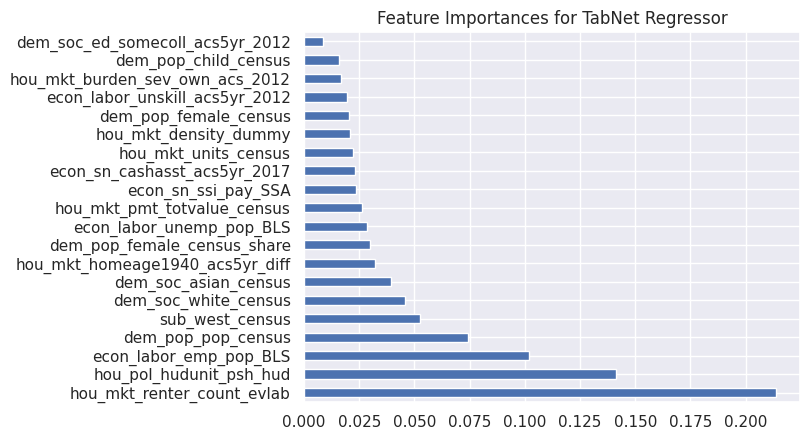

In [210]:

# regressor.feature_importances_
feat_importances = pd.Series(regressor.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh', title="Feature Importances for TabNet Regressor");

TODO Plans:
- Do feature importance of the models to see if they produce interesting results
     - Compare eda with model's feature importance
     - Hyperparameter tuning

- Start projection modeling
     - Compare feature importance of time series models to previous models
     - google feature importnace for forecasting before modelling.



#### Predicting Projected Rates of Homelessness

Can rates of homelessness be predicted using previous years' data?

##### To start, how does some of the data change over time?

In [195]:
raw_df.head()

year cocnumber  pit_tot_shelt_pit_hud  pit_tot_unshelt_pit_hud  \
0  2010    AK-500                   1113                      118   
1  2011    AK-500                   1082                      141   
2  2012    AK-500                   1097                       50   
3  2013    AK-500                   1070                       52   
4  2014    AK-500                    970                       53   

   pit_tot_hless_pit_hud  econ_urb_urbanicity  coctag  panelvar  \
0                   1231                    3       1         1   
1                   1223                    3       0         1   
2                   1147                    3       0         1   
3                   1122                    3       0         1   
4                   1023                    3       0         1   

   hou_pol_fedfundcoc  dem_pop_pop_census  ...  sub_high_cost_rent75  \
0            25.98005              285194  ...                     1   
1             27.1767              293370  ...                     1   
2            30.01799              296291  ...                     1   
3            29.96026              298520  ...                     1   
4            27.86784              301081  ...                     1   

   sub_high_cost_homeval75  sub_high_rent_share75  tight_high_cost_rental_mkt  \
0                        1                      1                           3   
1                        1                      0                           3   
2                        1                      1                           3   
3                        1                      0                           3   
4                        1                      1                           3   

   sub_tight_high_cost_rent  sub_west_coast_all_urb  sub_west_census  \
0                         1                       1                1   
1                         1                       1                1   
2                         1                       1                1   
3                         1                       1                1   
4                         1                       1                1   

   major_city  suburban  rural  
0           1         0      0  
1           1         0      0  
2           1         0      0  
3           1         0      0  
4           1         0      0  

[5 rows x 194 columns]

In [235]:
raw_df.groupby(['year', 'cocnumber'])[x]

In [240]:
raw_df.iloc[:50, :]

year cocnumber  pit_tot_shelt_pit_hud  pit_tot_unshelt_pit_hud  \
0   2010    AK-500                   1113                      118   
1   2011    AK-500                   1082                      141   
2   2012    AK-500                   1097                       50   
3   2013    AK-500                   1070                       52   
4   2014    AK-500                    970                       53   
5   2015    AK-500                   1029                      179   
6   2016    AK-500                    865                      240   
7   2017    AK-500                    973                      155   
8   2010    AK-501                    558                       74   
9   2011    AK-501                    678                      227   
10  2012    AK-501                    619                      147   
11  2013    AK-501                    671                      153   
12  2014    AK-501                    669                       92   
13  2015    AK-501                    610                      138   
14  2016    AK-501                    633                      202   
15  2017    AK-501                    578                      139   
16  2010    AL-500                   1069                     1204   
17  2011    AL-500                   1024                      926   
18  2012    AL-500                   1009                      698   
19  2013    AL-500                    960                      509   
20  2014    AL-500                    915                      414   
21  2015    AL-500                    916                      237   
22  2016    AL-500                   1032                      196   
23  2017    AL-500                    875                      217   
24  2010    AL-501                    482                      401   
25  2011    AL-501                    407                      311   
26  2012    AL-501                    324                      310   
27  2013    AL-501                    260                      233   
28  2014    AL-501                    461                      137   
29  2015    AL-501                    364                      214   
30  2016    AL-501                    387                      236   
31  2017    AL-501                    341                      265   
32  2010    AL-502                    162                        8   
33  2011    AL-502                    234                       10   
34  2012    AL-502                    188                        4   
35  2013    AL-502                    197                       26   
36  2014    AL-502                    189                       20   
37  2015    AL-502                    214                       31   
38  2016    AL-502                    286                       51   
39  2017    AL-502                    133                       22   
40  2010    AL-503                    645                      174   
41  2011    AL-503                    481                      175   
42  2012    AL-503                    432                      175   
43  2013    AL-503                    409                      177   
44  2014    AL-503                    499                       37   
45  2015    AL-503                    357                       63   
46  2016    AL-503                    298                       87   
47  2017    AL-503                    337                       99   
48  2010    AL-504                    294                      150   
49  2011    AL-504                    287                      146   

    pit_tot_hless_pit_hud  econ_urb_urbanicity  coctag  panelvar  \
0                    1231                    3       1         1   
1                    1223                    3       0         1   
2                    1147                    3       0         1   
3                    1122                    3       0         1   
4                    1023                    3       0         1   
5                    1208

In [253]:
raw_df.groupby(['cocnumber'])[y].mean()

cocnumber
AK-500      44742.5
AK-501    54605.125
AL-500     117644.5
AL-501    75698.625
AL-502    30996.125
            ...    
WV-500     18040.25
WV-501     20732.25
WV-503     35193.75
WV-508     143327.0
WY-500    74773.375
Name: hou_mkt_renter_count_evlab, Length: 376, dtype: Float64

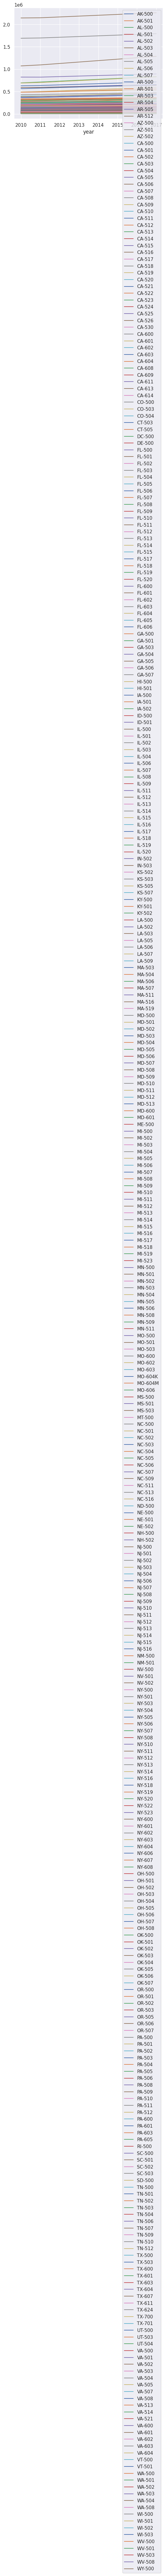

In [256]:
y = 'hou_mkt_renter_count_evlab'

plt_df = raw_df.set_index('year')

plt_df.groupby(['cocnumber'])[y].plot(legend=True);